In [1]:
%run ./get_fixed_variables.ipynb

In [2]:
lambda_assumed = 1.2 #[K/ (Wm-2)], assumed climate sensitivity parameter in back-of-envelope calculation, Schneider et al. 2019
CRE_assumed = 100 # [Wm-2], assumed net cre from removal of stratocumulus
warming_assumed = 8 # [K], warming predicted from back-of-envelope calculation

### First calculate the net average change in CRE in the cloud-locking regions to compare with the assumed 100 Wm-2:

In [3]:
## load TOA LWCF and SWCF from model for each simulation
LWCF_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_8xco2_strato.npy')
LWCF_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_8xco2_nostrato.npy')
SWCF_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_strato.npy')
SWCF_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_nostrato.npy')

SWCF_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_strato.npy')
SWCF_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_nostrato.npy')
LWCF_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_PI_strato.npy')
LWCF_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_PI_nostrato.npy')

In [6]:
# net CRE = SWCF + LWCF, take difference between no-strato and strato
net_CRE_8xco2 = yearly_avg(SWCF_8xco2_nostrato+LWCF_8xco2_nostrato, 30) - yearly_avg((SWCF_8xco2_strato+LWCF_8xco2_strato),30)
net_CRE_1xco2 = yearly_avg(SWCF_1xco2_nostrato+LWCF_1xco2_nostrato, 30) - yearly_avg((SWCF_1xco2_strato+LWCF_1xco2_strato),30)

CRE_8xco2_stratoregions = strato_avg(net_CRE_8xco2)
CRE_1xco2_stratoregions = strato_avg(net_CRE_1xco2)
print('Net change in CRE in strato cloud-locking regions: ' + str(np.round(CRE_8xco2_stratoregions,2)) + ' (8xco2), ' + str(np.round(CRE_1xco2_stratoregions,2)) + ' (1xco2)')


diff_assumed_warming_8xco2_CRE = warming_assumed - CRE_8xco2_stratoregions*lambda_assumed*0.065
diff_assumed_warming_1xco2_CRE = warming_assumed - CRE_1xco2_stratoregions*lambda_assumed*0.065

new_assumed_warming_8xco2_CRE = CRE_8xco2_stratoregions*lambda_assumed*0.065
new_assumed_warming_1xco2_CRE = CRE_1xco2_stratoregions*lambda_assumed*0.065

Net change in CRE in strato cloud-locking regions: 82.46 (8xco2), 85.44 (1xco2)


/glade/derecho/scratch/asalazar/tmp/ipykernel_18144/3087626620.py:64: RuntimeWarning: Mean of empty slice
  def strato_avg(data): return(np.nansum(np.nanmean((data)*strato_mask_plot, axis = 1)*lat_gw)/np.nansum(lat_gw))# average of varaible within stratocumulus cloud-locking region


## Calculate heat transport term (by calculating OLR change in cloud-locking region)

In [7]:
## load FLNT 
# net longwave at top of model
FLNT_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato3.npy')
FLNT_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato3.npy')
FLNT_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato3.npy')
FLNT_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato4.npy')

# net shortwave at top of model
FSNT_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato3.npy')
FSNT_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato3.npy')
FSNT_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato3.npy')
FSNT_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato4.npy')

In [8]:
net_OLR_8xco2 = yearly_avg(FLNT_8xco2_nostrato, 30) - yearly_avg(FLNT_8xco2_strato,30)
net_OLR_1xco2 = yearly_avg(FLNT_1xco2_nostrato, 30) - yearly_avg(FLNT_1xco2_strato,30)

net_ASR_8xco2 = yearly_avg(FSNT_8xco2_nostrato, 30) - yearly_avg(FSNT_8xco2_strato,30)
net_ASR_1xco2 = yearly_avg(FSNT_1xco2_nostrato, 30) - yearly_avg(FSNT_1xco2_strato,30)

OLR_8xco2_stratoregions = strato_avg(net_OLR_8xco2)
OLR_1xco2_stratoregions = strato_avg(net_OLR_1xco2)

ASR_8xco2_stratoregions = strato_avg(net_ASR_8xco2)
ASR_1xco2_stratoregions = strato_avg(net_ASR_1xco2)

print('Net change in OLR in strato cloud-locking regions: ' + str(np.round(OLR_8xco2_stratoregions,2)) + ' (8xco2), ' + str(np.round(OLR_1xco2_stratoregions,2)) + ' (1xco2)')
print('Net change in ASR in strato cloud-locking regions: ' + str(np.round(ASR_8xco2_stratoregions,2)) + ' (8xco2), ' + str(np.round(ASR_1xco2_stratoregions,2)) + ' (1xco2)')
print('Net change in TOA radiation in strato cloud-locking regions: ' + str(np.round(ASR_8xco2_stratoregions-OLR_8xco2_stratoregions,2)) + ' (8xco2), ' + str(np.round(ASR_1xco2_stratoregions-OLR_1xco2_stratoregions,2)) + ' (1xco2)')

Net change in OLR in strato cloud-locking regions: 8.1 (8xco2), 11.26 (1xco2)
Net change in ASR in strato cloud-locking regions: 83.34 (8xco2), 88.15 (1xco2)
Net change in TOA radiation in strato cloud-locking regions: 75.24 (8xco2), 76.89 (1xco2)


/glade/derecho/scratch/asalazar/tmp/ipykernel_18144/3087626620.py:64: RuntimeWarning: Mean of empty slice
  def strato_avg(data): return(np.nansum(np.nanmean((data)*strato_mask_plot, axis = 1)*lat_gw)/np.nansum(lat_gw))# average of varaible within stratocumulus cloud-locking region


In [9]:
OLR_change_elsewhere_8xco2 = (CRE_8xco2_stratoregions*0.065 - (OLR_8xco2_stratoregions*0.065))/(0.935)
OLR_change_elsewhere_1xco2 = (CRE_1xco2_stratoregions*0.065 - (OLR_1xco2_stratoregions*0.065))/(0.935)

diff_assumed_warming_8xco2_HT = new_assumed_warming_8xco2_CRE - OLR_change_elsewhere_8xco2*lambda_assumed
diff_assumed_warming_1xco2_HT = new_assumed_warming_1xco2_CRE - OLR_change_elsewhere_1xco2*lambda_assumed

new_assumed_warming_8xco2_HT = OLR_change_elsewhere_8xco2*lambda_assumed
new_assumed_warming_1xco2_HT = OLR_change_elsewhere_1xco2*lambda_assumed


## Model integration, use Gregory plot to extrapolate extra warming

In [4]:
TS_PI = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI.npy')
# TS, surface temp [K]
TS1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato1.npy')
TS1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato1.npy')
TS2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato2.npy')
TS2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato2.npy')
TS3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato3.npy')
TS3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato3.npy')
TS4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato4.npy')
TS4_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato4.npy')

# FSNT, net shortwave at TOA [Wm-2]
FSNT1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato1.npy')
FSNT1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato1.npy')
FSNT2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato2.npy')
FSNT2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato2.npy')
FSNT3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato3.npy')
FSNT3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato3.npy')
FSNT4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato4.npy')
# FLNT, net longwave at TOA [Wm-2]
FLNT1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato1.npy')
FLNT1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato1.npy')
FLNT2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato2.npy')
FLNT2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato2.npy')
FLNT3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato3.npy')
FLNT3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato3.npy')
FLNT4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato4.npy')

In [5]:
# TS, surface temp [K]
TS1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato1.npy')
TS1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato1.npy')
TS2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato2.npy')
TS2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato2.npy')
TS3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato3.npy')
TS3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato3.npy')

# FSNT, net shortwave at TOA [Wm-2]
FSNT1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato1.npy')
FSNT1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato1.npy')
FSNT2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato2.npy')
FSNT2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato2.npy')
FSNT3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato3.npy')
FSNT3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato3.npy')

# FLNT, net longwave at TOA [Wm-2]
FLNT1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato1.npy')
FLNT1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato1.npy')
FLNT2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato2.npy')
FLNT2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato2.npy')
FLNT3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato3.npy')
FLNT3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato3.npy')

In [6]:
FSNT_8xco2_nostrato = np.concatenate([FSNT1_8xco2_nostrato,FSNT2_8xco2_nostrato,FSNT3_8xco2_nostrato])
FLNT_8xco2_nostrato = np.concatenate([FLNT1_8xco2_nostrato,FLNT2_8xco2_nostrato,FLNT3_8xco2_nostrato])
TS_8xco2_nostrato = np.concatenate([TS1_8xco2_nostrato,TS2_8xco2_nostrato,TS3_8xco2_nostrato])

FSNT_8xco2_strato = np.concatenate([FSNT1_8xco2_strato,FSNT2_8xco2_strato,FSNT3_8xco2_strato])
FLNT_8xco2_strato = np.concatenate([FLNT1_8xco2_strato,FLNT2_8xco2_strato,FLNT3_8xco2_strato])
TS_8xco2_strato = np.concatenate([TS1_8xco2_strato,TS2_8xco2_strato,TS3_8xco2_strato])

TS_1xco2_strato = np.concatenate([TS1_1xco2_strato,TS2_1xco2_strato,TS3_1xco2_strato,TS4_1xco2_strato])
FLNT_1xco2_strato = np.concatenate([FLNT1_1xco2_strato,FLNT2_1xco2_strato,FLNT3_1xco2_strato,FLNT4_1xco2_strato])
FSNT_1xco2_strato = np.concatenate([FSNT1_1xco2_strato,FSNT2_1xco2_strato,FSNT3_1xco2_strato,FSNT4_1xco2_strato])

TS_1xco2_nostrato = np.concatenate([TS1_1xco2_nostrato,TS2_1xco2_nostrato,TS3_1xco2_nostrato])[:-1]
FLNT_1xco2_nostrato = np.concatenate([FLNT1_1xco2_nostrato,FLNT2_1xco2_nostrato,FLNT3_1xco2_nostrato])[:-1]
FSNT_1xco2_nostrato = np.concatenate([FSNT1_1xco2_nostrato,FSNT2_1xco2_nostrato,FSNT3_1xco2_nostrato])[:-1]


In [7]:
TOA_8xco2_nostrato = FSNT_8xco2_nostrato - FLNT_8xco2_nostrato
shape =int(np.shape(TOA_8xco2_nostrato)[0]/12)
TOA_8xco2_nostrato_greg = np.sum(np.average(np.average(TOA_8xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_nostrato_greg = np.sum(np.average(np.average(TS_8xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TOA_8xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TS_8xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_strato = FSNT_8xco2_strato[:-5*12] - FLNT_8xco2_strato[:-5*12]
shape =int(np.shape(TOA_8xco2_strato)[0]/12)
TOA_8xco2_strato_greg = np.sum(np.average(np.average(TOA_8xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_strato_greg = np.sum(np.average(np.average(TS_8xco2_strato[:-5*12].reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TOA_8xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TS_8xco2_strato[:-5*12].reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

In [8]:
TOA_1xco2_nostrato = FSNT_1xco2_nostrato - FLNT_1xco2_nostrato
shape =int(np.shape(TOA_1xco2_nostrato[:])[0]/12)
TOA_1xco2_nostrato_greg = np.sum(np.average(np.average(TOA_1xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_nostrato_greg = np.sum(np.average(np.average(TS_1xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TOA_1xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TS_1xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_strato = FSNT_1xco2_strato - FLNT_1xco2_strato
shape =int(np.shape(TOA_1xco2_strato)[0]/12)
TOA_1xco2_strato_greg = np.sum(np.average(np.average(TOA_1xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_strato_greg = np.sum(np.average(np.average(TS_1xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TOA_1xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TS_1xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

In [9]:
TS_8xco2_diff_greg = TS_8xco2_nostrato_greg-TS_8xco2_strato_greg
TOA_8xco2_diff_greg = TOA_8xco2_nostrato_greg-TOA_8xco2_strato_greg
TS_8xco2_diff_greg_dec = TS_8xco2_nostrato_greg_dec-TS_8xco2_strato_greg_dec
TOA_8xco2_diff_greg_dec = TOA_8xco2_nostrato_greg_dec-TOA_8xco2_strato_greg_dec


TS_1xco2_diff_greg = TS_1xco2_nostrato_greg-TS_1xco2_strato_greg
TOA_1xco2_diff_greg = TOA_1xco2_nostrato_greg-TOA_1xco2_strato_greg
TS_1xco2_diff_greg_dec = TS_1xco2_nostrato_greg_dec-TS_1xco2_strato_greg_dec
TOA_1xco2_diff_greg_dec = TOA_1xco2_nostrato_greg_dec-TOA_1xco2_strato_greg_dec

Text(0.5, 0, 'Year')

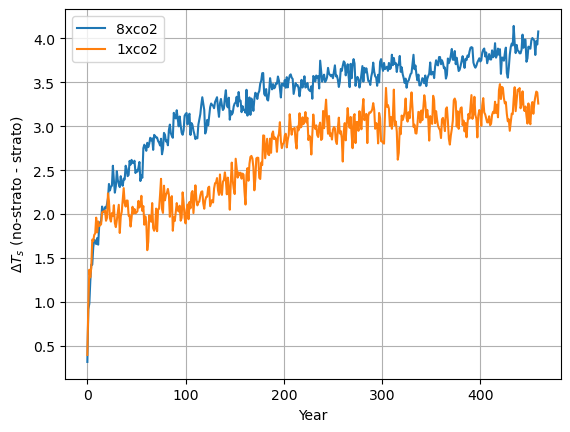

In [16]:
plt.plot(TS_8xco2_diff_greg, label = '8xco2')
plt.plot(TS_1xco2_diff_greg, label = '1xco2')
plt.legend()
plt.grid()
plt.ylabel('$\\Delta T_s$ (no-strato - strato)')
plt.xlabel('Year')

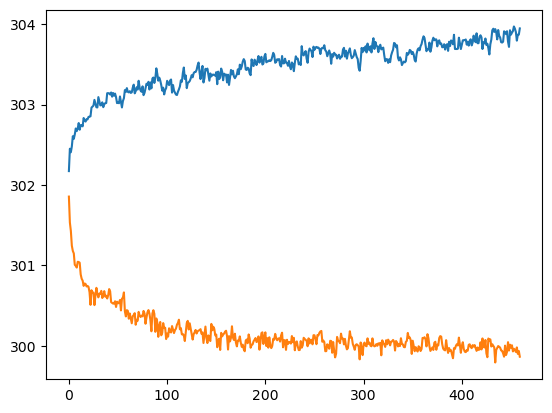

In [19]:
plt.plot(TS_8xco2_nostrato_greg)
plt.plot(TS_8xco2_strato_greg)

In [17]:
np.mean(TOA_1xco2_diff_greg_dec[-5:]), np.mean(TOA_8xco2_diff_greg_dec[-5:])

(0.4564730610957282, 0.3023526397140089)

Text(-0.2, 1.1, 'B')

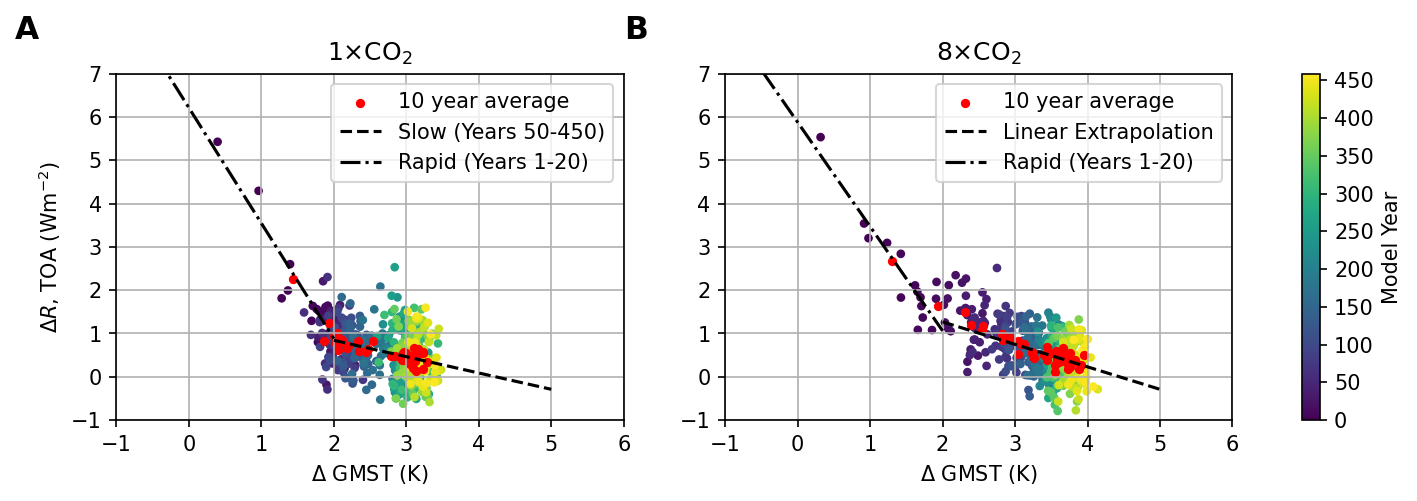

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,3),dpi=150)

m_slow_1xco2,b_slow_1xco2 = np.polyfit(TS_1xco2_diff_greg[50:], TOA_1xco2_diff_greg[50:],1)
m_rapid_1xco2,b_rapid_1xco2 = np.polyfit(TS_1xco2_diff_greg[:15], TOA_1xco2_diff_greg[:15],1)
x_list_slow = np.linspace(2,5,100)
x_list_rapid = np.linspace(-1,2,10)
time = np.arange(0, len(TS_1xco2_nostrato_greg),1)
c = ax[0].scatter(TS_1xco2_diff_greg, TOA_1xco2_diff_greg, c=time,s=10, cmap = 'viridis')
#plt.colorbar(c,ticks = [0,50,100,150,200,250,300,350,400,450],ax = ax[0],label = 'Model Year')
ax[0].scatter(TS_1xco2_diff_greg_dec, TOA_1xco2_diff_greg_dec, c='red', marker='o',s=12, label = '10 year average')
ax[0].plot(x_list_slow, m_slow_1xco2*x_list_slow+b_slow_1xco2, 'k--', label = 'Slow (Years 50-450)')
ax[0].plot(x_list_rapid, m_rapid_1xco2*x_list_rapid+b_rapid_1xco2, 'k',linestyle='dashdot', label = 'Rapid (Years 1-20)')
ax[0].grid()
ax[0].set_ylim(-1,7)
ax[0].set_xlim(-1, 6)
ax[0].legend()
ax[0].set_ylabel('$\\Delta R$, TOA (Wm$^{-2}$)')
ax[0].set_xlabel('$\\Delta$ GMST (K)')
ax[0].set_title('1$\\times$CO$_2$')

m_slow_8xco2,b_slow_8xco2 = np.polyfit(TS_8xco2_diff_greg[50:], TOA_8xco2_diff_greg[50:],1)
m_rapid_8xco2,b_rapid_8xco2 = np.polyfit(TS_8xco2_diff_greg[:15], TOA_8xco2_diff_greg[:15],1)
time = np.arange(0, len(TS_8xco2_nostrato_greg),1)
c = ax[1].scatter(TS_8xco2_diff_greg, TOA_8xco2_diff_greg, c=time,s=10, cmap = 'viridis')
plt.colorbar(c,ticks = [0,50,100,150,200,250,300,350,400,450],ax = ax[:],label = 'Model Year')
ax[1].scatter(TS_8xco2_diff_greg_dec, TOA_8xco2_diff_greg_dec, c='red', marker='o',s=12, label = '10 year average')
ax[1].plot(x_list_slow, m_slow_8xco2*x_list_slow+b_slow_8xco2, 'k--', label = 'Linear Extrapolation')
ax[1].plot(x_list_rapid, m_rapid_8xco2*x_list_rapid+b_rapid_8xco2, 'k',linestyle='dashdot', label = 'Rapid (Years 1-20)')
ax[1].grid()
ax[1].set_ylim(-1,7)
ax[1].set_xlim(-1, 6)
ax[1].legend()
#ax[1].set_ylabel('$\\Delta R$, TOA (Wm$^{-2}$)')
ax[1].set_xlabel('$\\Delta$ GMST (K)')
ax[1].set_title('8$\\times$CO$_2$')

ax[0].annotate('A', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1].annotate('B', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')

In [11]:
eq_deltT_1xco2 = -b_slow_1xco2/m_slow_1xco2
eq_deltT_8xco2 = -b_slow_8xco2/m_slow_8xco2

GMST_8xco2 = np.mean(TS_8xco2_diff_greg[-5:])
GMST_1xco2 = np.mean(TS_1xco2_diff_greg[-5:])
print('Extrapolated warming with full equilibriation: ' + str(np.round(eq_deltT_8xco2,2)) + ' K (8xco2), ' + str(np.round(eq_deltT_1xco2,2)) + ' K (1xco2)')
print('Observed warming at end of model run: ' + str(np.round(GMST_8xco2,2)) + ' K (8xco2), ' + str(np.round(GMST_1xco2,2)) + ' K (1xco2)')


diff_assumed_warming_8xco2_EQ =  eq_deltT_8xco2 - GMST_8xco2
diff_assumed_warming_1xco2_EQ =  eq_deltT_1xco2 - GMST_1xco2

Extrapolated warming with full equilibriation: 4.44 K (8xco2), 4.23 K (1xco2)
Observed warming at end of model run: 3.95 K (8xco2), 3.33 K (1xco2)


In [12]:
initial_radforce_1xco2 = b_rapid_1xco2
initial_radforce_8xco2 = b_rapid_8xco2

print('Initial radiative forcing (no-strato-strato): ' + str(np.round(b_rapid_8xco2,2)) + ' Wm-2 (8xco2), ' + str(np.round(b_rapid_1xco2,2)) + ' Wm-2 (1xco2)')
print('Assumed radiative forcing = 6.5% x 100 Wm-2 = 6.5 Wm-2')

diff_radforce_1xco2 = CRE_assumed*0.065 - b_rapid_1xco2
diff_radforce_8xco2 = CRE_assumed*0.065 - b_rapid_8xco2

diff_assumed_warming_1xco2_radforce = lambda_assumed*diff_radforce_1xco2
diff_assumed_warming_8xco2_radforce = lambda_assumed*diff_radforce_8xco2

print('Missing warming accounted for by radiative forcing: ' + str(np.round(diff_assumed_warming_8xco2_radforce,2)) + ' K (8xco2), ' + str(np.round(diff_assumed_warming_1xco2_radforce,2)) + ' K (1xco2)')


Initial radiative forcing (no-strato-strato): 5.88 Wm-2 (8xco2), 6.21 Wm-2 (1xco2)
Assumed radiative forcing = 6.5% x 100 Wm-2 = 6.5 Wm-2
Missing warming accounted for by radiative forcing: 0.75 K (8xco2), 0.35 K (1xco2)


In [13]:
## lambda (climate sensitivity parameter) should be 1/(b_rapid/eq_deltT) K/Wm-2

lambda_1xco2 = 1/(b_rapid_1xco2/eq_deltT_1xco2)
lambda_8xco2 = 1/(b_rapid_8xco2/eq_deltT_8xco2)

print('Calculated climate sensitivity parameter: ' + str(np.round(lambda_8xco2,2)) + ' K/Wm-2 (8xco2), ' + str(np.round(lambda_1xco2,2)) + ' K/Wm-2 (1xco2)')

## warming accounted for (lambda_assumed - lambda) * initial rad forc

diff_assumed_warming_1xco2_lambda = (lambda_assumed-lambda_1xco2)*b_rapid_1xco2
diff_assumed_warming_8xco2_lambda = (lambda_assumed-lambda_8xco2)*b_rapid_8xco2

print('Missing warming accounted for by lambda: ' + str(np.round(diff_assumed_warming_8xco2_lambda,2)) + ' K (8xco2), ' + str(np.round(diff_assumed_warming_1xco2_lambda,2)) + ' K (1xco2)')



Calculated climate sensitivity parameter: 0.76 K/Wm-2 (8xco2), 0.68 K/Wm-2 (1xco2)
Missing warming accounted for by lambda: 2.61 K (8xco2), 3.22 K (1xco2)


In [32]:
total_8xco2, GMST_8xco2

(3.84784993797258, 3.9521500620274197)

In [17]:
total_8xco2 = diff_assumed_warming_8xco2_radforce + diff_assumed_warming_8xco2_EQ+diff_assumed_warming_8xco2_lambda
total_1xco2 = diff_assumed_warming_1xco2_radforce + diff_assumed_warming_1xco2_EQ+diff_assumed_warming_1xco2_lambda
print('Total ``missing`` warming accounted for: ' + str(np.round(total_8xco2,2)) + ' K (8xco2), ' + str(np.round(total_1xco2,2)) + ' K (1xco2)')

residual_8xco2 = 7.8 - total_8xco2 - GMST_8xco2
residual_1xco2 = 7.8 - total_1xco2 - GMST_1xco2

print('Residual: ' + str(np.round(residual_8xco2,3)) + ' K (8xco2), ' + str(np.round(residual_1xco2,3)) + ' K (1xco2)')
residual_1xco2

Total ``missing`` warming accounted for: 3.85 K (8xco2), 4.47 K (1xco2)
Residual: 0.0 K (8xco2), -0.0 K (1xco2)


-4.440892098500626e-16

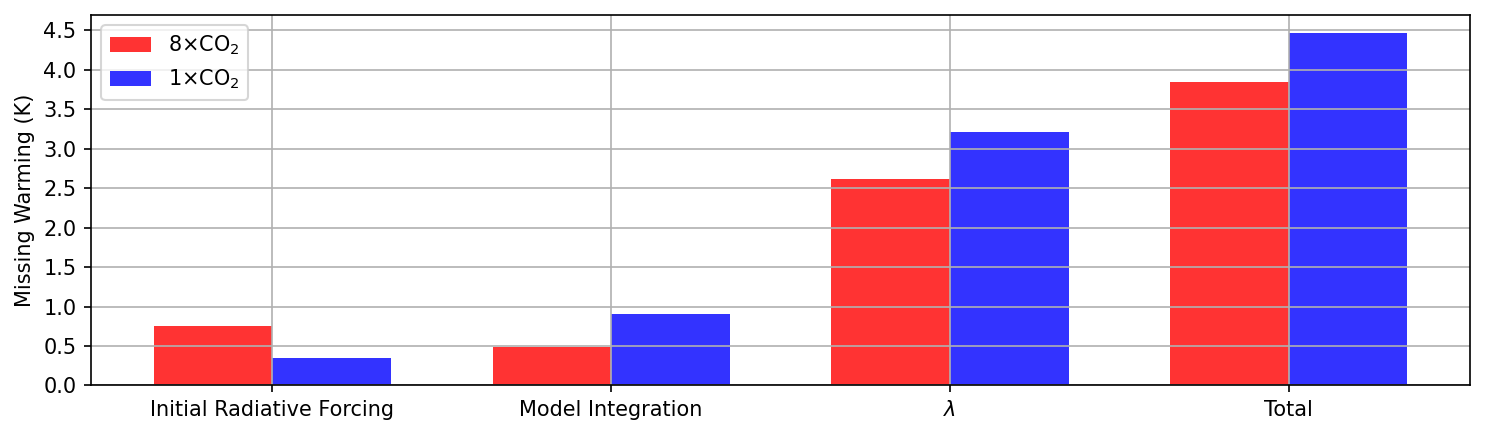

In [20]:
categories = ['Initial Radiative Forcing', 'Model Integration', '$\\lambda$', 'Total']
missing_warming_8xco2 = [diff_assumed_warming_8xco2_radforce, diff_assumed_warming_8xco2_EQ, diff_assumed_warming_8xco2_lambda, total_8xco2]  # Values for the first group
missing_warming_1xco2 = [diff_assumed_warming_1xco2_radforce, diff_assumed_warming_1xco2_EQ, diff_assumed_warming_1xco2_lambda, total_1xco2]  # Values for the second group

# Number of categories and bar width
n_categories = len(categories)
bar_width = 0.35  # Width of the bars

# Positions for the bars
index = np.arange(n_categories)

# Create the bar chart
fig, ax = plt.subplots(figsize = (10, 3),dpi=150)
bar1 = ax.bar(index, missing_warming_8xco2, bar_width, color = 'r', alpha = 0.8, label='8$\\times$CO$_2$')
bar2 = ax.bar(index + bar_width, missing_warming_1xco2, bar_width, color = 'b', alpha = 0.8, label='1$\\times$CO$_2$')

# Add labels, title, and legend
#ax.set_xlabel('Categories')
ax.set_ylabel('Missing Warming (K)')
#ax.set_title('Bar chart with 4 categories and 2 bars per category')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks([0,0.5,1,1.5,2, 2.5,3, 3.5, 4, 4.5])
ax.set_xticklabels(categories)
ax.legend()

ax.grid()
# Show the plot
plt.tight_layout()
plt.savefig('./Figure_PDFs/Figure_7.pdf', bbox_inches='tight')
plt.show()